## Example 6.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde as kde
from scipy.stats import norm
from scipy.stats import uniform

%matplotlib inline

In [2]:
a=0.79; b=0.99; c=1-4.5*np.sqrt(0.1); d=1+4.5*np.sqrt(0.1)

In [3]:
def pdf_prior1(x):
    return uniform.pdf(x,loc=a, scale=b-a)        #loc is the left side, scale is the length of the interval

def pdf_prior2(x):
    return uniform.pdf(x,loc=c, scale=d-c)

def pdf_observe(x):
    return norm.pdf(x,loc=0.3,scale=0.025)              #scale indicates standard deviation

## Part I-Step1 Generate random sample from uniform prior

In [4]:
N = 10000 # set sample size

In [5]:
lambda1=np.random.uniform(low=a,high=b,size=N)                     
lambda2=np.random.uniform(low=c,high=d,size=N)

## Part I-Step2 Compute $q_1, q_2, ... q_{10000}$

In [6]:
def qoi1(x,y):
    q = np.sqrt((1-x)/(1+x*y))
    return q

q=qoi1(lambda1,lambda2)

#q=np.sqrt((1-lambda1)/(1+lambda1*lambda2))

## Part I-Step3 Apply KDE to get pdf_pushprior

In [7]:
pdf_pushprior=kde(q)

## Part II-Step1 Get $r_q=r(q)$

In [8]:
r_q=pdf_observe(q)/pdf_pushprior(q)

In [9]:
M=max(r_q)

## Part II-Step2 Get $\xi$ from uniform distribution

In [10]:
xi=np.random.uniform(low=0,high=1,size=N)

## Part II-Step3 Get $\eta=r_q/M$

In [11]:
eta=r_q/M

## Part II-Step4 Compare $\xi$ and $\eta$

In [12]:
lambda1_post=np.array([])
lambda2_post=np.array([])

In [13]:
for i in range(N):
    if eta[i] > xi[i]:
        lambda1_post=np.append(lambda1_post,lambda1[i])
        lambda2_post=np.append(lambda2_post,lambda2[i])

In [14]:
len(lambda1_post)

2018

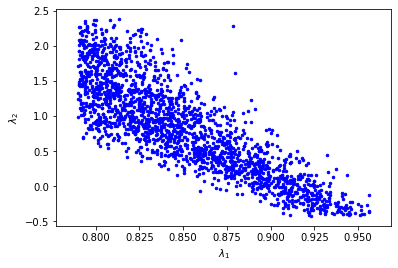

In [15]:
plt.figure()
plt.scatter(lambda1_post,lambda2_post,s=25,c='b',marker='.')
plt.xlabel('$\lambda_1$')
plt.ylabel('$\lambda_2$')
plt.show()

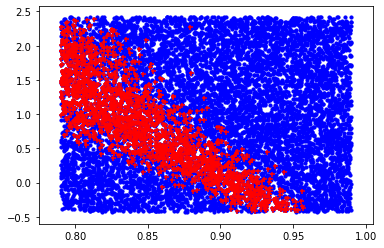

In [16]:
plt.figure()

plt.scatter(lambda1, lambda2,s=10, c='b', marker='o')

plt.scatter(lambda1_post,lambda2_post,s=25,c='r',marker='+')


## Part II-Step5 Get pdf_pushpost

In [17]:
#q_post = qoi1(lambda1_post, lambda2_post)

q_post=np.sqrt((1-lambda1_post)/(1+lambda1_post*lambda2_post))

In [18]:
pdf_pushpost=kde(q_post)

In [ ]:
def post_pdf1(x,y):
    post = pdf_prior1(x)*pdf_prior2(y)*pdf_observe(qoi1(x,y))/pdf_pushprior(qoi1(x,y))
    return post


x = np.linspace(lambda1.min(),lambda1.max(),500)
y = np.linspace(lambda2.min(),lambda2.max(),500)
xx, yy = np.meshgrid(x, y)
z = post_pdf1(xx.flatten(), yy.flatten())
z = np.reshape(z,(500,500))
print(z.shape)

plt.figure()
plt.xlabel('$\lambda_1$')
plt.ylabel('$\lambda_2$')
plt.contourf(xx,yy,z)
#plt.imshow(z, origin='lower', interpolation="none")
#plt.xticks(np.arange(xx.shape[1]), xx[0,:])  # need to set the ticks manually
#plt.yticks(np.arange(yy.shape[0]), yy[:,0])
plt.colorbar()


## Graph

In [ ]:
print(np.sqrt(0.01/(1-0.99*c)))
print(0.21/(1-0.99*d))

In [ ]:
fig, ax1 = plt.subplots(1, 1)
#x = np.linspace(q.min(),q.max(),100)
x = np.linspace(0,0.7,100)

y1 = pdf_observe(x)
plt.plot(x, y1, c='orange',label='Observed')

y2 = pdf_pushprior(x)
plt.plot(x, y2, c='blue',label='PF prior')

y3 = pdf_pushpost(x)
plt.plot(x, y3, linestyle='--', c='blue',label='PF posterior')

#plt.yticks(np.arange(min(x), max(x)+1, 1.0))
#plt.ylim(0, 15,5)
plt.legend()
plt.xlabel('Quantity of interest');
# fig.savefig('Fig6-1.png');

In [ ]:
fig = plt.figure(figsize=(7,5))
#x = np.linspace(q.min(),q.max(),100)
x = np.linspace(0,0.7,100)

y1 = pdf_observe(x)
plt.plot(x, y1, linewidth=4,c='blue',label='$\pi_{\mathcal{D}}$')

y2 = pdf_pushprior(x)
plt.plot(x, y2, linewidth=4, c='green',label='PF of '+'$\pi_{\Lambda}^{init}$')

y3 = pdf_pushpost(x)
plt.plot(x, y3, linewidth=2, linestyle='--', c='orangered',label='PF of '+'$\pi_{\Lambda}^{up}$')

#plt.yticks(np.arange(min(x), max(x)+1, 1.0))
#plt.ylim(0, 15,5)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.xlabel('Quantity of interest',fontsize=14)
#plt.show()
# fig.savefig('Fig6-1.png')
plt.legend(prop={'size': 12});
fig.savefig('3.png');

## Example 6.2

### Method 1

In [ ]:
def q1(lam):
    samplesize = lam.shape[0]
    sampledim  = lam.shape[1]
    lam1 = lam[:,0]
    lam2 = lam[:,1]
    
    q1 = np.exp(-lam1**2-lam2**2)-lam1**3-lam2**3
    return q1

def q2(lam):
    samplesize = lam.shape[0]
    sampledim  = lam.shape[1]
    lam1 = lam[:,0]
    lam2 = lam[:,1]
    
    q2 = 1 + q1(lam) + (1/(4*2))*(lam1**2+lam2**2)
    return q2

def qoi2(lam):
    samplesize = lam.shape[0]
    sampledim  = lam.shape[1]
    lam1 = lam[:,0]
    lam2 = lam[:,1]
    
    index1 = np.where((3*lam1+2*lam2>=0) & (-lam1+0.3*lam2<0))
    index2 = np.where((3*lam1+2*lam2>=0) & (-lam1+0.3*lam2>=0))
    index3 = np.where((lam1+1)**2+(lam2+1)**2<0.95**2)
    index4 = np.where((3*lam1+2*lam2<0) & ((lam1+1)**2+(lam2+1)**2>=0.95**2))
    
    q = np.zeros(samplesize)

    q[index1] = q1(lam)[index1]-2
    q[index2] = 2*q2(lam)[index2]
    q[index3] = 2*q1(lam)[index3]+4
    q[index4] = q1(lam)[index4]
    
    return q

#### test of the new defined function

In [ ]:
x = np.array([[1,0],[2,0],[3,0],[0,0]])
print(x.shape)
print(q1(x))
print(q2(x))
print(qoi2(x))

## Method 2

In [ ]:
def q1(lam):
    samplesize = lam.shape[0]
    sampledim  = lam.shape[1]
    lam1 = lam[:,0]
    lam2 = lam[:,1]
    
    q1 = np.exp(-lam1**2-lam2**2)-lam1**3-lam2**3
    return q1

def q2(lam):
    samplesize = lam.shape[0]
    sampledim  = lam.shape[1]
    lam1 = lam[:,0]
    lam2 = lam[:,1]
    
    q2 = 1 + q1(lam) + (1/(4*2))*(lam1**2+lam2**2)
    return q2

def qoi2(lam):
    samplesize = lam.shape[0]
    sampledim  = lam.shape[1]
    lam1 = lam[:,0]
    lam2 = lam[:,1]
    q = np.zeros(samplesize)
    
    for i in range(samplesize):
        if (3*lam[i,0]+2*lam[i,1]>=0) and (-lam[i,0]+0.3*lam[i,1]<0):
            q[i] = (q1(lam)[i])-2
        elif (3*lam[i,0]+2*lam[i,1]>=0) and (-lam[i,0]+0.3*lam[i,1]>=0):
            q[i] = 2*(q2(lam)[i])
        elif (lam[i,0]+1)**2+(lam[i,1]+1)**2<0.95**2:
            q[i] = 2*(q1(lam)[i])+4
        else:
            q[i] = q1(lam)[i]   
    return q

#### test of the new defined function

In [ ]:
x = np.array([[1,0],[2,0],[3,0],[0,0]])
print(x.shape)
print(q1(x))
print(q2(x))
print(qoi2(x))

In [ ]:
def pdf_prior1(x):
    return uniform.pdf(x,loc=-1, scale=2)        #loc is the left side, scale is the length of the interval

def pdf_prior2(x):
    return uniform.pdf(x,loc=-1, scale=2)

def pdf_observe(x):
    return norm.pdf(x,loc=-2.0,scale=0.25)

## Part I-Step1 Generate random sample from uniform prior

In [ ]:
N = 10000 # set sample size

lambda1=np.random.uniform(low=-1,high=1,size=N).reshape(-1,1)                     
lambda2=np.random.uniform(low=-1,high=1,size=N).reshape(-1,1)

lam=np.concatenate((lambda1,lambda2),axis=1)

## Part I-Step2 Compute $q_1, q_2, ... q_{10000}$

In [ ]:
q=qoi2(lam)

## Part I-Step3 Apply KDE to get pdf_pushprior

In [ ]:
pdf_pushprior=kde(q)

## Part II-Step1 Get $r_q=r(q)$

In [ ]:
r_q=pdf_observe(q)/pdf_pushprior(q)
M=max(r_q)

## Part II-Step2 Get $\xi$ from uniform distribution

In [ ]:
xi=np.random.uniform(low=0,high=1,size=N)

## Part II-Step3 Get $\eta=r_q/M$

In [ ]:
eta=r_q/M

## Part II-Step4 Compare $\xi$ and $\eta$

#### <FONT COLOR = RED> Method 1

In [ ]:
lambda1_post=np.array([])
lambda2_post=np.array([])       #don't define an array with fixed length, b/c you don't know before making comparison
                                #to get the length, we can use len(np.where(eta>xi))
for i in range(N):
    if eta[i] > xi[i]:
        lambda1_post=np.append(lambda1_post,lambda1[i])
        lambda2_post=np.append(lambda2_post,lambda2[i])

#### <FONT COLOR = RED> Method 2

In [ ]:
lam1 = lam[:,0]
lam2 = lam[:,1]
    
postindex = np.where(eta > xi )
lambda1_post = lam1[postindex]
lambda2_post = lam2[postindex]

In [ ]:
print(len(lambda1_post))

In [ ]:
plt.figure()

plt.scatter(lambda1_post,lambda2_post,s=25,c='b',marker='.')
plt.xlabel('$\lambda_1$')
plt.ylabel('$\lambda_2$')
plt.show()

In [ ]:
plt.figure()

plt.scatter(lambda1, lambda2,s=10, c='b', marker='o')

plt.scatter(lambda1_post,lambda2_post,s=25,c='r',marker='+')


## Part II-Step5 Get pdf_pushpost

In [ ]:
lam_post=np.concatenate((lambda1_post.reshape(-1,1),lambda2_post.reshape(-1,1)),axis=1)

q_post=qoi2(lam_post)

pdf_pushpost=kde(q_post)

<font color = red> Define the posterior pdf

In [ ]:
def post_pdf2(x):
    post = pdf_prior1(x[:,0])*pdf_prior2(x[:,1])*pdf_observe(qoi2(x))/pdf_pushprior(qoi2(x))
    return post

In [ ]:
lam1 = lam[:,0]
lam2 = lam[:,1]

x = np.linspace(lam1.min(),lam1.max(),100)
y = np.linspace(lam2.min(),lam2.max(),100)
xx, yy = np.meshgrid(x, y)
z = post_pdf2(np.array([xx.flatten(),yy.flatten()]).transpose())
z = np.reshape(z,(100,100))

plt.figure()
plt.xlabel('$\lambda_1$')
plt.ylabel('$\lambda_2$')
plt.contourf(xx,yy,z)
# plt.imshow(z, origin='lower', interpolation="none")
# plt.xticks(np.arange(xx.shape[1]), xx.ravel())  
# plt.yticks(np.arange(yy.shape[0]), yy.ravel())
plt.colorbar();

In [ ]:
fig, ax1 = plt.subplots(1, 1)

x1 = np.linspace(q.min(),q.max(),100)

y1 = pdf_observe(x1)
ax1.plot(x1, y1, 'r',label='Observed')    

y2 = pdf_pushprior(x1)
ax1.plot(x1, y2, 'b',label='PF prior')

# x3 = q_post
y3 = pdf_pushpost(x1)
ax1.plot(x1, y3, 'k',linestyle='--',label='PF posterior')

plt.legend()
plt.xlabel('Quantity of interest')
plt.show()